# Monte Carlo Convergence & Performance Analysis  
We study how the European call price estimate via Monte Carlo  
converges to the Black–Scholes value as we increase the number of paths,  
and we benchmark the runtime of each simulation.

| Symbol | Meaning                | Value        |
|:------:|:----------------------:|:------------:|
| \(S_0\) | Initial spot price     | 100          |
| \(K\)   | Strike price           | 100          |
| \(r\)   | Risk-free rate         | 5 %          |
| $(\sigma)$ | Volatility          | 20 %         |
| \(T\)   | Time to maturity       | 1 year       |
| Option  | Call or Put            | **Call**     |
| Paths   | Number of simulations  | varied       |
| Steps   | Time steps per path    | 1 (analytic) |

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import os, sys

sys.path.append(os.path.abspath("../../"))

from pricing.bsm import bsm_price
from pricing.monte_carlo import mc_european_price

In [2]:
# Option and model parameters
S0 = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2
option_type = "call"

In [3]:
# Simulation Loop
n_paths_list = [1000, 5000, 10000, 50000, 100000]

mc_prices = []
mc_times = []
errors = []

# analytic reference
ref_price = bsm_price(S0, K, r, sigma, T, is_call=True)

for N in n_paths_list:
    start = time.time()
    price, ci95 = mc_european_price(
        S0,
        K,
        r,
        sigma,
        T,
        N_paths=N,
        N_steps=1,  # direct terminal simulation
        is_call=True,
        seed=42,
    )
    elapsed = time.time() - start

    mc_prices.append(price)
    mc_times.append(elapsed)
    errors.append(abs(price - ref_price))

## 📈 Performance and Accuracy
We now plot the runtime and error of Monte Carlo pricing against the number of simulation paths.

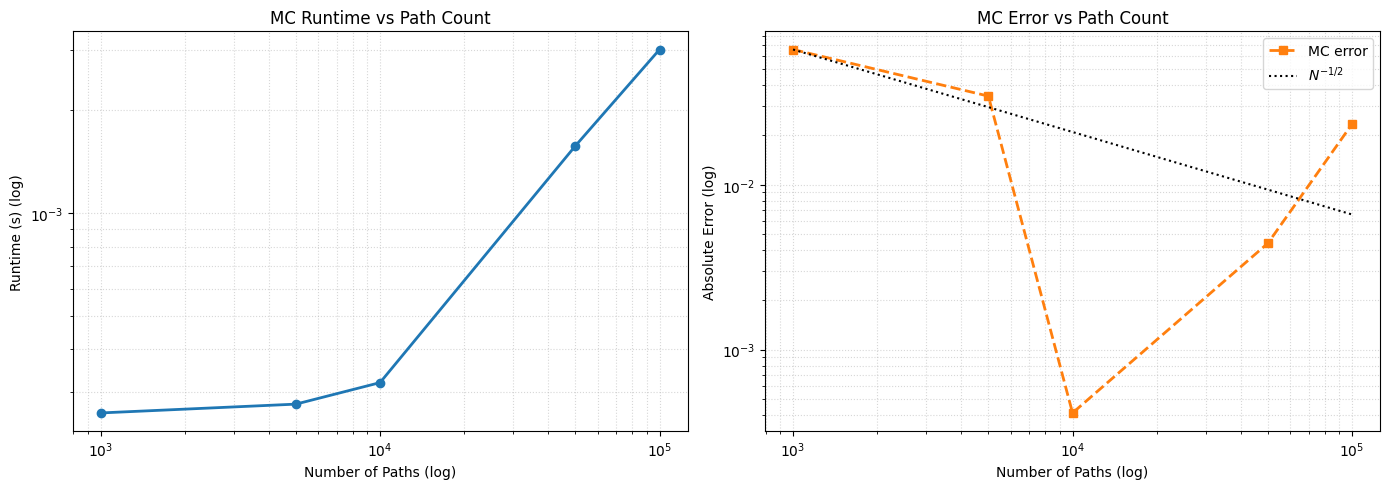

In [4]:
plt.figure(figsize=(14, 5))

# Runtime vs paths
plt.subplot(1, 2, 1)
plt.plot(n_paths_list, mc_times, "o-", lw=2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Paths (log)")
plt.ylabel("Runtime (s) (log)")
plt.title("MC Runtime vs Path Count")
plt.grid(which="both", ls=":", alpha=0.5)

# Error vs paths
plt.subplot(1, 2, 2)
plt.plot(n_paths_list, errors, "s--", color="C1", lw=2, label="MC error")
# reference slope N^{-1/2}
ref = errors[0] * (np.array(n_paths_list) / n_paths_list[0]) ** -0.5
plt.plot(n_paths_list, ref, "k:", label=r"$N^{-1/2}$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Paths (log)")
plt.ylabel("Absolute Error (log)")
plt.title("MC Error vs Path Count")
plt.legend()
plt.grid(which="both", ls=":", alpha=0.5)
plt.tight_layout()
plt.show()

### Observations
- **Runtime** grows roughly ∝ \(N\) (straight line on log–log).  
- **Error** decays at the expected \(O(N^{-1/2})\) rate (straight, parallel to ref-slope).  
- For cent-level accuracy, you need on the order of \(10^5\) paths.

**Conclusion:**  
Monte Carlo is flexible but suffers from slow \(N^{-1/2}\) convergence;  
for vanilla calls, PDE or analytic methods are preferable when speed  
and precision are both critical.